# Irony detection LLM

## few shot

In [1]:
import cohere, os, re, time, pandas as pd

api_key = os.getenv("CO_API_KEY")
api_key = ""

co = cohere.Client(
    api_key=api_key,
)

# EVA : Utterance, Response : 評価用
df_label_irony_eva = pd.read_csv('./eva_ironic.csv')
df_label_not_eva = pd.read_csv('./eva_not_ironic.csv')
df_eva = pd.concat([df_label_irony_eva, df_label_not_eva], ignore_index=True)
df_eva['label'] = [1] * len(df_label_irony_eva) + [0] * len(df_label_not_eva)
df_eva = df_eva.sample(frac=1, random_state=42).reset_index(drop=True)

y_true = df_eva['label']

# ラベルの対応
id2label = {0: 'NOTIRONY', 1: 'IRONY'}
label2id = {'NOTIRONY': 0, 'IRONY': 1}

results = []

for i in range(len(df_eva)):
    utr = df_eva['Utterance'][i].replace("\n", " ")
    res = df_eva['Response'][i].replace("\n", " ")

    prompt = f"""
    以下の対話において、返答が発話に対して皮肉を含んでいるかどうかを判定してください。
    結果は <b> </b> のタグで囲んだ、<b>True</b> <b>False</b> のどちらかで答えてください。

    例1:
    発話: すみません、電車が遅れて遅刻しました。
    返答: おや、今日は随分早く来ましたね。
    
    推論
    ・遅刻しているのにも関わらず、「早く来た」と言っているため、実際の状況と矛盾
    ・わざと「早い」と言うことで、遅刻の程度の酷さを強調
    -> 皮肉であると考えられる
    <b>True</b>

    例2:
    発話: すみません、電車が遅れて遅刻しました。
    返答: 次からは余裕をもって来るようにしてください。
    
    推論
    ・実際の状況と一致、問題を具体的に指摘している。
    ・建設的な指摘である。
    -> 皮肉でないと考えられる
    <b>False</b>

    発話: {utr}
    返答: {res}

    """

    chat = co.chat(
            message=prompt,
            model="command-r-plus-08-2024",
    )

    resp = chat.chat_history[-1].message
    print(resp)

    pattern = r"<b>(.*?)</b>"
    matches = re.findall(pattern, resp, re.DOTALL)

    if matches:
        resp = matches[-1].strip()
        if resp == "True":
            results.append(1)
        elif resp == "False":
            results.append(0)
    else:
        print("No match found")
    time.sleep(1)



<b>False</b>
<b>False</b>
<b>True</b>
<b>False</b>
<b>True</b>
<b>False</b>
<b>True</b>
<b>False</b>
<b>False</b>
<b>False</b>
<b>False</b>
<b>True</b>
<b>True</b>
<b>True</b>
<b>False</b>
<b>False</b>
<b>False</b>
<b>True</b>
<b>False</b>
<b>False</b>
<b>False</b>
<b>True</b>
<b>False</b>
<b>True</b>
<b>True</b>
<b>False</b>
<b>False</b>
<b>False</b>
<b>True</b>
<b>True</b>
<b>True</b>
<b>False</b>
<b>False</b>
<b>True</b>
<b>False</b>
<b>False</b>
<b>True</b>
<b>True</b>
<b>True</b>
<b>True</b>
<b>False</b>
<b>False</b>
<b>True</b>
<b>True</b>
<b>True</b>
<b>False</b>
<b>True</b>
<b>False</b>
<b>True</b>
<b>False</b>
<b>True</b>
<b>False</b>
<b>False</b>
<b>False</b>
<b>False</b>
<b>False</b>
<b>False</b>
<b>False</b>
<b>False</b>
<b>True</b>
<b>False</b>
<b>False</b>
<b>True</b>
<b>True</b>
<b>False</b>
<b>True</b>
<b>False</b>
<b>False</b>
<b>True</b>
<b>True</b>
<b>True</b>
<b>False</b>
<b>False</b>
<b>True</b>
<b>False</b>
<b>False</b>
<b>False</b>
<b>True</b>
<b>False</b>
<b>Tru

[0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]
[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,

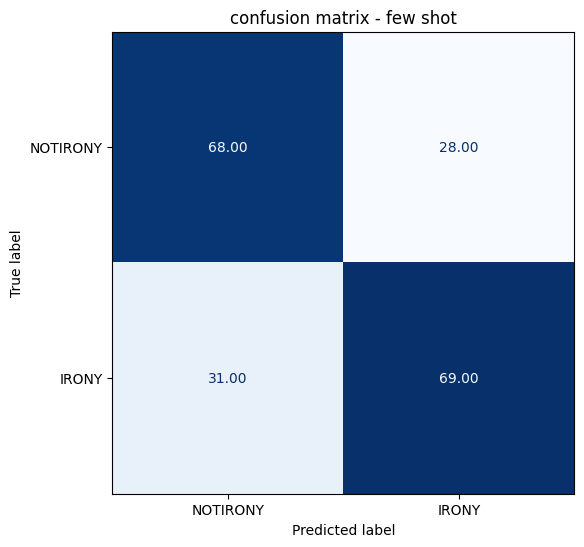

'\nNegative : NOTIRONY\nPositive : IRONY\n\nTN FP\nFN TP\n'

In [2]:
print(df_eva['label'].tolist())
print(results)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

labels = ['NOTIRONY', 'IRONY']

cm = ""
def plot_confusion_matrix(y_preds, y_true, labels):
    global cm
    cm = confusion_matrix(y_true, y_preds)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("confusion matrix - few shot")
    plt.savefig("confusion_matrix_zeroshot.png")
    plt.show()

plot_confusion_matrix(results, y_true, labels)

"""
Negative : NOTIRONY
Positive : IRONY

TN FP
FN TP
"""

In [3]:
"""
Negative : NOTIRONY
Positive : IRONY

TN FP
FN TP
"""

print(cm.flatten())

tn, fp, fn, tp = cm.flatten()

print(tn)

print(fp)

print(fn)

print(tp)

# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy : {accuracy}")

# Precision
precision = tp / (tp + fp)
print(f"Precision : {precision}")

# Recall
recall = tp / (tp + fn)
print(f"Recall : {recall}")

# F1
f1 = 2 * precision * recall / (precision + recall)
print(f"F1 : {f1}")

[68 28 31 69]
68
28
31
69
Accuracy : 0.6989795918367347
Precision : 0.711340206185567
Recall : 0.69
F1 : 0.700507614213198
